<a href="https://colab.research.google.com/github/mori4413/website.github.io/blob/main/fit_thermocouple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pypdf2
!pip install pikepdf
!pip install pdfminer.six # for japanese

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 6.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 15.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 24.4 MB/s 
     |████████████████████████████████| 4.0 MB 42.2 MB/s 


In [209]:
#
import PyPDF2 #only English
import pdfminer
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LAParams
from io import StringIO

import pandas as pd
import glob
import os
import pathlib
import shutil
from pikepdf import Pdf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f_path='/content/drive/MyDrive/Prog/Python/thermocouple_fitting/'

os.chdir(f_path)
files=os.listdir(f_path)
print(files)

['fit_thermocouple.ipynb', 'sample.pdf', 'W-5%Re.jpg', 'W-5%Re.pdf', 'W-5%Re_1.pdf', 'W-5Re.xlsx', 'pdf2txt.py']


In [ ]:
!python3 pdf2txt.py -M=5 W-5%Re_1.pdf -o out.txt
f_name=f_path+'out.txt'
# python.exe pdf2txt.py [options] -o [OutFilename] [InFilename] 
#調整は[options] に設定します。文字間隔(M)　単語の間隔(W)　行間隔(L)　縦読み(V)
#パラメータ無指定の場合はデフォルト値が採用されます。 M = 1.0, W = 0.2, L = 0.3 。横読みです。
#縦読みをしたい場合は、 -V を指定します。

In [304]:
col_names =['', '0', '10', '20', '30', '40', '50', '60', '70', '80', '90']
df=pd.read_csv(f_name, encoding='utf-8', skiprows=1, sep=' ',names=col_names, index_col=0)# names=['raw data'])#header=10 )
df=df.dropna()
df

,0,10,20,30,40,50,60,70,80,90
,,,,,,,,,,
0,0.000,0.135,0.273,0.413,0.555,0.699,0.846,0.994,1.145,1.297
100,1.451,1.608,1.766,1.926,2.087,2.251,2.415,2.582,2.750,2.919
200,3.090,3.262,3.436,3.610,3.786,3.963,4.141,4.321,4.501,4.682
300,4.865,5.048,5.232,5.417,5.603,5.789,5.976,6.164,6.353,6.542
400,6.732,6.922,7.113,7.305,7.497,7.689,7.882,8.075,8.269,8.463
500,8.657,8.851,9.046,9.241,9.436,9.631,9.827,10.022,10.218,10.413
600,10.609,10.804,10.999,11.195,11.390,11.585,11.780,11.974,12.169,12.364
700,12.559,12.753,12.947,13.141,13.335,13.529,13.723,13.916,14.109,14.301
800,14.494,14.686,14.878,15.069,15.260,15.451,15.641,15.831,16.021,16.210


## ここからグラフ化して近似

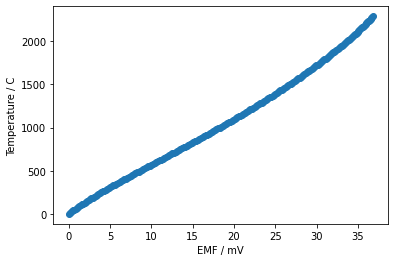

In [362]:
dat_T = np.arange(0, 2300, 10) 

dat_V=df.to_numpy()
dat_V=np.ravel(dat_V) #numpy.ravel()関数による一次元化
plt.scatter(x=dat_V, y=dat_T)
plt.xlabel("EMF / mV")
plt.ylabel("Temperature / C")
plt.show()

In [363]:
func_V=np.polyfit(dat_V,dat_T,5)
print(func_V)

[ 3.44322401e-05 -3.20901439e-03  1.29026157e-01 -2.33706632e+00
  7.00249467e+01  1.99076228e+00]


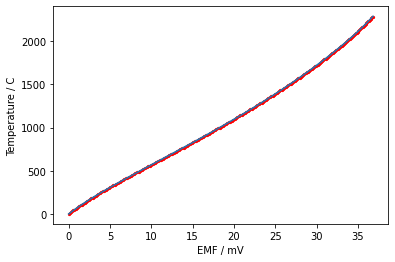

In [364]:
y1 = np.poly1d(func_V)(dat_V)
plt.scatter(x=dat_V, y=y1, color='r', s=5, marker='o')
plt.plot(dat_V, dat_T)
plt.xlabel("EMF / mV")
plt.ylabel("Temperature / C")
plt.show()

In [379]:
val_V=input('Please input EMF value (mV)   ')
val_V=float(val_V)
res=func_V[0]*val_V**5+func_V[1]*val_V**4+func_V[2]*val_V**3+func_V[3]*val_V**2+func_V[4]*val_V**1+func_V[5]
print(res)

Please input EMF value (mV)   12
670.7354921918161


In [380]:
func_T=np.polyfit(dat_T,dat_V,5)
print(func_T)

[-4.90160605e-16  3.57498220e-12 -1.04374007e-08  1.22140187e-05
  1.33987241e-02 -1.73466103e-04]


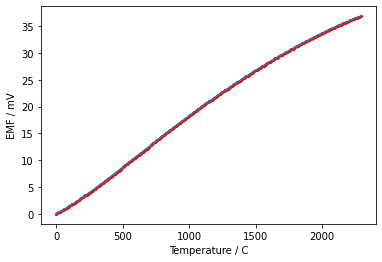

In [366]:
y2 = np.poly1d(func_T)(dat_T)
plt.scatter(x=dat_T, y=y2, color='r', s=5, marker='o')
plt.plot(dat_T, dat_V)
plt.ylabel("EMF / mV")
plt.xlabel("Temperature / C")
plt.show()

In [382]:
val_T=input('Please input Temperature value (C)')
val_T=float(val_T)
res=func_T[0]*val_T**5+func_T[1]*val_T**4+func_T[2]*val_T**3+func_T[3]*val_T**2+func_T[4]*val_T**1+func_T[5]
print(res)

Please input Temperature value (C)1500
26.729417745171162
